In [1]:
import pandas as pd
from scipy.stats import norm
"""Создаем функцию, которая считает цену фьючерса при различных сценариях"""
import math
def future_change(price,strike,time,r,std):
    changes=[]
    changes.append(0)
    changes.append(0)
    changes.append(price*(1+1/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1+1/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1-1/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1-1/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1+2/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1+2/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1-2/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1-2/3*std)-strike*(math.exp(-time*r)))
    changes.append(price*(1+std)-strike*(math.exp(-time*r)))
    changes.append(price*(1+std)-strike*(math.exp(-time*r)))
    changes.append(price*(1-std)-strike*(math.exp(-time*r)))
    changes.append(price*(1-std)-strike*(math.exp(-time*r)))
    changes.append((price*(1+2*std)-strike*(math.exp(-time*r)))*0.35)
    changes.append((price*(1-2*std)-strike*(math.exp(-time*r)))*0.35)
    return changes

In [3]:
"""Создаем функцию, которая считает цену опциона"""
def option_price_share(price, strike, IV, time, r, put=False):
    ln=math.log(price/strike)
    d1=(r+(IV**2)/2)*time
    d2=(r-(IV**2)/2)*time
    denom=IV*math.sqrt(time)
    Nd1=norm.cdf((ln+d1)/denom, loc=0, scale=1)
    Nd2=norm.cdf((ln+d2)/denom, loc=0, scale=1)
    Nd_1=norm.cdf(-(ln+d1)/denom, loc=0, scale=1)
    Nd_2=norm.cdf(-(ln+d2)/denom, loc=0, scale=1)
    option=price*Nd1-strike*math.exp(-r*time)*Nd2
    if put:
        option=strike*math.exp(-r*time)*Nd_2-price*Nd_1
    return option

In [4]:
"""Создаем функцию, которая считает цену опциона при различных сценариях"""
def option_change(price, strike, IV, time, r, basic_std, delta_std, put=False):
    sc1=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price, strike, IV+delta_std, time, r, put=False)
    sc2=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price, strike, IV-delta_std, time, r, put=False)
    sc3=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+1/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc4=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+1/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc5=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-1/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc6=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-1/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc7=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc8=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2/3*basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc9=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2/3*basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc10=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2/3*basic_std, strike, IV-delta_std, time, r, put=False)
    sc11=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc12=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc13=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-basic_std*price, strike, IV+delta_std, time, r, put=False)
    sc14=option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-basic_std*price, strike, IV-delta_std, time, r, put=False)
    sc15=(option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price+2*basic_std*price, strike, IV, time, r, put=False))*0.35
    sc16=(option_price_share(price, strike, IV, time, r, put=False)-option_price_share(price-2*basic_std*price, strike, IV, time, r, put=False))*0.35
    changes=[-sc1,-sc2,-sc3,-sc4,-sc5,-sc6,-sc7,-sc8,-sc9,-sc10,-sc11,-sc12,-sc13,-sc14,-sc15,-sc16]
    if put:
        sc1=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price, strike, IV+delta_std, time, r, put=True)
        sc2=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price, strike, IV-delta_std, time, r, put=True)
        sc3=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+1/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc4=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+1/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc5=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-1/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc6=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-1/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc7=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc8=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2/3*basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc9=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2/3*basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc10=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2/3*basic_std, strike, IV-delta_std, time, r, put=True)
        sc11=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc12=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc13=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-basic_std*price, strike, IV+delta_std, time, r, put=True)
        sc14=option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-basic_std*price, strike, IV-delta_std, time, r, put=True)
        sc15=(option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price+2*basic_std*price, strike, IV, time, r, put=True))*0.35
        sc16=(option_price_share(price, strike, IV, time, r, put=True)-option_price_share(price-2*basic_std*price, strike, IV, time, r, put=True))*0.35
        changes=[-sc1,-sc2,-sc3,-sc4,-sc5,-sc6,-sc7,-sc8,-sc9,-sc10,-sc11,-sc12,-sc13,-sc14,-sc15,-sc16]
    return changes

Создаем портфель, в котором 2000 фьючерсов, которые можем закрывать каждый день, но с ограничением в 500 штук. Также есть 2000 опционов put и 2000 опционов call, которые можем закрыть только через 15 дней.

In [5]:
risk_final=[]
r=0.05
std=0.2
delta_std=0.2
fut_strike=1.5786
option_strike=1.62
price=1.565
IV=0.25
q_fut=[2000,1500,1000,500,0,0,0,0,0,0,0,0,0,0,0]
q_c=[-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,0]
q_p=[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,0]
for i in range(0,len(q_fut)):
    std=std+i*0.001
    delta_std=delta_std+i*0.01
    fut_time=(63-i)/365
    option_time=(252-i)/365
    fut_scan=[k*q_fut[i] for k in future_change(price,fut_strike,fut_time,r,std)]
    call_scan=[h*q_c[i] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)]
    put_scan=[v*q_p[i] for v in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=True)]
    margin_scenario=[]
    for j in range(0,len(fut_scan)):
        margin_scenario.append(fut_scan[j]+call_scan[j]+put_scan[j])
    risk_final.append(min(margin_scenario))


In [6]:
risk_final

[-150.73683364516987,
 -157.6567298124867,
 -318.1589189663582,
 -483.9241903836868,
 -657.3000000000002,
 -672.9500000000003,
 -691.7300000000002,
 -713.6400000000001,
 -738.6800000000001,
 -766.8500000000006,
 -798.1499999999996,
 -832.5799999999999,
 -870.1400000000003,
 -910.8299999999995,
 0.0]

In [7]:
import matplotlib.pyplot as plt

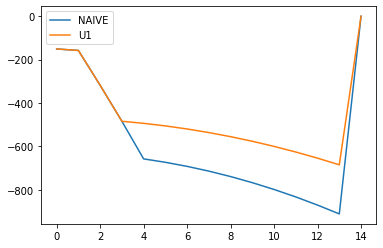

In [15]:
plt.plot(risk_final)
plt.plot(risk_final_max)
plt.legend(['NAIVE','U1'])

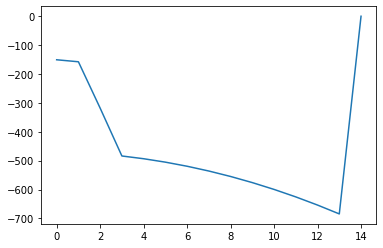

In [14]:
plt.plot(risk_final_max)

In [10]:
1.565-1.5786*(math.exp(-63*0.05/365))

-3.508348925174154e-05

In [11]:
option_price_share(1.565, 1.62, 0.25, 252/365, 0.05, put=False)-option_price_share(1.565, 1.62, 0.25, 252/365, 0.05, put=True)

-3.0951791479827406e-05

In [12]:
risk_final_max=[]
r=0.05
std=0.2
delta_std=0.2
fut_strike=1.5786
option_strike=1.62
price=1.565
IV=0.25
q_fut=[2000,1500,1000,500,500,500,500,500,500,500,500,500,500,500,0]
q_c=[-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,0]
q_p=[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,0]
for i in range(0,len(q_fut)):
    std=std+i*0.001
    delta_std=delta_std+i*0.01
    fut_time=(63-i)/365
    option_time=(252-i)/365
    fut_scan=[k*q_fut[i] for k in future_change(price,fut_strike,fut_time,r,std)]
    call_scan=[h*q_c[i] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)]
    put_scan=[v*q_p[i] for v in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=True)]
    margin_scenario=[]
    for j in range(0,len(fut_scan)):
        margin_scenario.append(fut_scan[j]+call_scan[j]+put_scan[j])
    risk_final_max.append(min(margin_scenario))


In [13]:
risk_final_max

[-150.73683364516987,
 -157.6567298124867,
 -318.1589189663582,
 -483.9241903836868,
 -493.42143597436586,
 -505.26619625722765,
 -519.4584712342853,
 -535.998260907552,
 -554.8855652790407,
 -576.1203843507658,
 -599.702718124739,
 -625.6325666029776,
 -653.9099297874943,
 -684.5348076803027,
 0.0]

In [11]:
risk_optimize=[]
fut_coeff=[]
call_coeff=[]
put_coeff=[]
r=0.05
std=0.1
delta_std=0.1
fut_strike=1.5786
option_strike=1.62
price=1.565
IV=0.25
q_fut=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
q_c=[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
q_p=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in range(0,len(q_fut)):
    std=std+i*0.001
    delta_std=delta_std+i*0.001
    fut_time=(63-i)/365
    option_time=(252-i)/365
    fut_scan=future_change(price,fut_strike,fut_time,r,std)
    call_scan=option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)
    put_scan=option_change(price, option_strike, IV, option_time, r, std, delta_std, put=True)
    margin_scenario=[]
    for j in range(0,len(fut_scan)):
        margin_scenario.append(fut_scan[j]-call_scan[j]+put_scan[j])
    risk_optimize.append(min(margin_scenario))
    fut_coeff.append(fut_scan[margin_scenario.index(min(margin_scenario))])
    call_coeff.append(call_scan[margin_scenario.index(min(margin_scenario))]+option_price_share(price, option_strike, IV, option_time, r, put=False))
    put_coeff.append(put_scan[margin_scenario.index(min(margin_scenario))]+option_price_share(price, option_strike, IV, option_time, r, put=True))


In [12]:
fut_coeff

[-0.10436841682258513,
 -0.10562615320832491,
 -0.1079272522996908,
 -0.11127171410070713,
 -0.11565953861539802,
 -0.12109072584778824,
 -0.1275652758019037,
 -0.13508318848177026,
 -0.1436444638914145,
 -0.15324910203486386,
 -0.1638971029161458,
 -0.1755884665392886,
 -0.18832319290832156,
 -0.20210128202727362,
 -0.2169227339001747]

In [13]:
put_coeff

[0.11405211155617556,
 0.11398676952056486,
 0.11386990492881188,
 0.11372415748707732,
 0.11358308950878582,
 0.11349402290219601,
 0.11352245368667102,
 0.11375877540932411,
 0.11432840756127804,
 0.1154067734156039,
 0.11724028222334204,
 0.1201709503092514,
 0.1246460900873183,
 0.13113817951154982,
 0.13979001874165475]

In [14]:
risk_optimize

[-0.03770175015591826,
 -0.038292819874991335,
 -0.03926058563302426,
 -0.040605047434040475,
 -0.042326205282064766,
 -0.04442405918112158,
 -0.04689860913523697,
 -0.04974985514843727,
 -0.052977797224747825,
 -0.05658243536819707,
 -0.06056376958281251,
 -0.06492179987262181,
 -0.06965652624165473,
 -0.07476794869394013,
 -0.08025606723350792]

In [15]:
option_price_share(price, option_strike, IV, option_time, r, put=False)

0.12443591183951774

In [16]:
call_scan

[0.10237883684408366,
 -0.10321342148988744,
 0.1671898357334881,
 -0.01961447636754743,
 0.045365964410023385,
 -0.1239709313125831,
 0.23896252550297925,
 0.08641612638328278,
 -0.0031521101067646384,
 -0.12434782070219247,
 0.316812295591264,
 0.1933538294083743,
 -0.04273414869900033,
 -0.12443591183878216,
 0.1824017159709811,
 -0.043437518952003484]

In [17]:
coeff = [i * (-1) for i in fut_coeff]
coeff

[0.10436841682258513,
 0.10562615320832491,
 0.1079272522996908,
 0.11127171410070713,
 0.11565953861539802,
 0.12109072584778824,
 0.1275652758019037,
 0.13508318848177026,
 0.1436444638914145,
 0.15324910203486386,
 0.1638971029161458,
 0.1755884665392886,
 0.18832319290832156,
 0.20210128202727362,
 0.2169227339001747]

In [18]:
from scipy.optimize import linprog

In [19]:
obj=coeff

In [20]:
lhs_eq=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
rhs_eq = [-2000] 

In [21]:
lhs_ineq = [[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],  
            [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0], 
            [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
           [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
           [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
           [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
           [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
           [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
           [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
           [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
           [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
           [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
           [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]

rhs_ineq = [-500,-500,-500,-500,-500,-500,-500,-500,-500,-500,-500,-500,-500,-500,-500] 

In [22]:
bnd = [(float(-500),0),
       (float(-500),0),(float(-500),0),
       (float(-500),0),(float(-500),0),
      (float(-500),0),(float(-500),0),
      (float(-500),0),(float(-500),0),
       (float(-500),0),(float(-500),0),
       (float(-500),0),(float(-500),0),
       (float(-500),0),(float(-500),0)] 

In [23]:
opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
              method="revised simplex")

opt

     con: array([-2000.])
     fun: 0.0
 message: 'The problem is (trivially) infeasible because the bounds fix all variables to values inconsistent with the constraints'
     nit: 0
   slack: array([-500., -500., -500., -500., -500., -500., -500., -500., -500.,
       -500., -500., -500., -500., -500., -500.])
  status: 2
 success: False
       x: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
import numpy as np

In [25]:
futures_price = -5.0*np.ones(15)

In [26]:
call_price=-2.0*np.ones(15)
put_price=1.0*np.ones(15)

In [27]:
futures_volume=2000
call_volume=-2000
put_volume=2000

In [28]:
f_day_limit=500

In [29]:
futures_closeout=np.zeros(15)
if futures_price[0]>0:
    if futures_volume%f_day_limit==0:
        close_days=int(futures_volume/f_day_limit)
        for i in range(1,close_days+1):
            futures_closeout[-i]=f_day_limit
    else:
        close_days=futures_volume//f_day_limit+1
        futures_closeout[-1]=futures_volume%f_day_limit
        for i in range(2,close_days+1):
            futures_closeout[-i]=f_day_limit
else:
    if futures_volume%f_day_limit==0:
        close_days=int(futures_volume/f_day_limit)
        for i in range(0,close_days):
            futures_closeout[i]=f_day_limit
    else:
        close_days=futures_volume//f_day_limit
        futures_closeout[close_days]=futures_volume%f_day_limit
        for i in range(0,close_days):
            futures_closeout[i]=f_day_limit
    

In [30]:
futures_closeout

array([500., 500., 500., 500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.])

In [31]:
arr = np.array([2, 3, 5, 7])

In [32]:
arr[-2]=6

In [33]:
for i in range(1,3):
    print(arr[-i])

7
6


In [34]:
arr

array([2, 3, 6, 7])

In [35]:
500%300

200

In [48]:
futures_volume%f_day_limit

200

In [ ]:
risk_final_scenarios=[]
r=0.05
fut_strike=1.5786
option_strike=1.62
price=1.565
IV=0.25
sale_fut_0=[0,500,500,500,500,0,0,0,0,0,0,0,0,0,0]

import itertools
per = itertools.permutations(sale_fut_0)
sale_fut_00=[]
for val in per:
    sale_fut_00.append(val)
sale_fut = list(set(sale_fut_00))


q_c=[-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,-2000,0]
q_p=[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,0]


for j in range(0,len(sale_fut)):
    risk_final_max=[]
    q_fut=2000
    std=0.01
    delta_std=0.005
    for i in range(0,len(sale_fut[j])):
        std=std+i*0.001
        delta_std=delta_std+i*0.001
        fut_time=(63-i)/365
        option_time=(252-i)/365
        q_fut=q_fut-sale_fut[j][i]
        fut_scan=[k*q_fut for k in future_change(price,fut_strike,fut_time,r,std)]
        call_scan=[h*q_c[i] for h in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=False)]
        put_scan=[v*q_p[i] for v in option_change(price, option_strike, IV, option_time, r, std, delta_std, put=True)]
        margin_scenario=[]
        for j in range(0,len(fut_scan)):
            margin_scenario.append(fut_scan[j]+call_scan[j]+put_scan[j])
        risk_final_max.append(min(margin_scenario))
    risk_final_scenarios.append(risk_final_max)

In [77]:
risk_final_scenarios

[[-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.877625233877804,
  -8.98172981248746,
  -10.868378449536694,
  -13.537571151060693,
  -16.

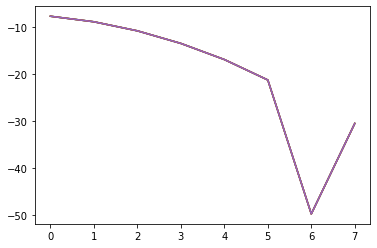

In [82]:
for i in range(0,5):
    plt.plot(risk_final_scenarios[i])
plt.show()

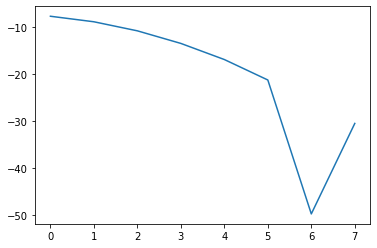

In [83]:
 plt.plot(risk_final_scenarios[0])

In [86]:
risk_final_scenarios

[[-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.603500311836875,
  -8.785639749982588,
  -10.721171266048435,
  -13.41009486808131,
  -16.85241056412901,
  -21.223588771682948,
  -49.836942468570946,
  -30.503260907551844],
 [-7.877625233877804,
  -8.98172981248746,
  -10.868378449536694,
  -13.537571151060693,
  -16.

In [85]:
sale_fut

[(0, 500, 500, 500, 0, 0, 500, 0),
 (0, 500, 500, 0, 0, 500, 500, 0),
 (0, 500, 500, 0, 500, 0, 500, 0),
 (0, 500, 0, 500, 500, 500, 0, 0),
 (0, 0, 500, 0, 500, 500, 500, 0),
 (500, 0, 500, 500, 0, 500, 0, 0),
 (500, 500, 0, 0, 0, 0, 500, 500),
 (500, 500, 500, 0, 0, 0, 500, 0),
 (0, 500, 500, 500, 0, 500, 0, 0),
 (0, 0, 500, 500, 0, 500, 500, 0),
 (0, 0, 0, 500, 0, 500, 500, 500),
 (500, 500, 500, 0, 500, 0, 0, 0),
 (0, 500, 0, 0, 500, 0, 500, 500),
 (0, 0, 500, 500, 500, 0, 500, 0),
 (500, 0, 0, 500, 0, 0, 500, 500),
 (500, 0, 0, 0, 0, 500, 500, 500),
 (500, 500, 0, 500, 0, 0, 500, 0),
 (500, 500, 0, 0, 0, 500, 500, 0),
 (0, 500, 500, 500, 0, 0, 0, 500),
 (0, 500, 500, 0, 0, 500, 0, 500),
 (500, 0, 0, 0, 500, 500, 500, 0),
 (500, 500, 0, 500, 500, 0, 0, 0),
 (500, 500, 0, 0, 500, 0, 500, 0),
 (0, 500, 500, 0, 500, 0, 0, 500),
 (0, 500, 0, 0, 500, 500, 500, 0),
 (0, 0, 500, 0, 500, 500, 0, 500),
 (500, 0, 500, 0, 0, 0, 500, 500),
 (0, 0, 0, 500, 500, 500, 0, 500),
 (500, 0, 0, 500, 0,

In [105]:
margin=[]
for i in range(0,len(risk_final_scenarios)):
    margin.append(sum(risk_final_scenarios[i]))

In [106]:
margin

[-158.9366089078835,
 -158.9366089078835,
 -158.9366089078835,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -158.9366089078835,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -158.9366089078835,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -158.9366089078835,
 -171.9204763188008,
 -171.9204763188008,
 -158.9366089078835,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -171.9204763188008,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -158.9366089078835,
 -158.9366089078835,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763188008,
 -171.9204763

In [107]:
option_price_share(price, option_strike, IV, 252/365, r, put=False)

0.1294465130276835

In [108]:
p=pd.DataFrame(columns=['sale_fut','margin'])
p['sale_fut']=sale_fut
p['margin']=margin

In [109]:
maximum=p['margin'].max()
p=p[p['margin']==maximum]
p

,sale_fut,margin
0,"(0, 500, 500, 500, 0, 0, 500, 0)",-158.936609
1,"(0, 500, 500, 0, 0, 500, 500, 0)",-158.936609
2,"(0, 500, 500, 0, 500, 0, 500, 0)",-158.936609
3,"(0, 500, 0, 500, 500, 500, 0, 0)",-158.936609
4,"(0, 0, 500, 0, 500, 500, 500, 0)",-158.936609
8,"(0, 500, 500, 500, 0, 500, 0, 0)",-158.936609
9,"(0, 0, 500, 500, 0, 500, 500, 0)",-158.936609
10,"(0, 0, 0, 500, 0, 500, 500, 500)",-158.936609
12,"(0, 500, 0, 0, 500, 0, 500, 500)",-158.936609
13,"(0, 0, 500, 500, 500, 0, 500, 0)",-158.936609


In [100]:
option_price_share(price-2*delta_std*price, option_strike, IV, 252/365, r, put=False)

0.08545471583840447

In [73]:
price-2*delta_std*price

-0.4100000000000321

In [56]:
sale_fut[50][6]

500

In [40]:
risk_final_max

[-150.73683364516987,
 -157.6567298124867,
 -318.1589189663582,
 -483.9241903836868,
 -657.3000000000002,
 -672.9500000000003,
 -691.7300000000002,
 0.0]

In [48]:
a=[500,500,0,0]
import itertools
per = itertools.permutations(a)
list1=[]
for val in per:
    list1.append(val)
    print(*val)


500 500 0 0
500 500 0 0
500 0 500 0
500 0 0 500
500 0 500 0
500 0 0 500
500 500 0 0
500 500 0 0
500 0 500 0
500 0 0 500
500 0 500 0
500 0 0 500
0 500 500 0
0 500 0 500
0 500 500 0
0 500 0 500
0 0 500 500
0 0 500 500
0 500 500 0
0 500 0 500
0 500 500 0
0 500 0 500
0 0 500 500
0 0 500 500


In [45]:
listNumbers

[]

In [47]:
per

In [49]:
list1

[(500, 500, 0, 0),
 (500, 500, 0, 0),
 (500, 0, 500, 0),
 (500, 0, 0, 500),
 (500, 0, 500, 0),
 (500, 0, 0, 500),
 (500, 500, 0, 0),
 (500, 500, 0, 0),
 (500, 0, 500, 0),
 (500, 0, 0, 500),
 (500, 0, 500, 0),
 (500, 0, 0, 500),
 (0, 500, 500, 0),
 (0, 500, 0, 500),
 (0, 500, 500, 0),
 (0, 500, 0, 500),
 (0, 0, 500, 500),
 (0, 0, 500, 500),
 (0, 500, 500, 0),
 (0, 500, 0, 500),
 (0, 500, 500, 0),
 (0, 500, 0, 500),
 (0, 0, 500, 500),
 (0, 0, 500, 500)]

In [50]:
listNumbers = list(set(list1))
listNumbers

[(0, 500, 0, 500),
 (0, 0, 500, 500),
 (500, 500, 0, 0),
 (500, 0, 500, 0),
 (0, 500, 500, 0),
 (500, 0, 0, 500)]

In [88]:
sum(risk_final_scenarios[0])

-158.93660890788394